<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Average-differential-equation" data-toc-modified-id="Average-differential-equation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Average differential equation</a></span><ul class="toc-item"><li><span><a href="#Sin(x)" data-toc-modified-id="Sin(x)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Sin(x)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Differential-equation" data-toc-modified-id="Differential-equation-1.1.0.1"><span class="toc-item-num">1.1.0.1&nbsp;&nbsp;</span>Differential equation</a></span></li><li><span><a href="#Long-term-difference" data-toc-modified-id="Long-term-difference-1.1.0.2"><span class="toc-item-num">1.1.0.2&nbsp;&nbsp;</span>Long term difference</a></span></li></ul></li></ul></li><li><span><a href="#Let's-try-it-with-a-box" data-toc-modified-id="Let's-try-it-with-a-box-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Let's try it with a box</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Test-different-time-windows" data-toc-modified-id="Test-different-time-windows-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Test different time windows</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Average differential equation
I test a differential equation (online method) to keep track of the probabilities

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (12.9, 12)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)

## Sin(x)

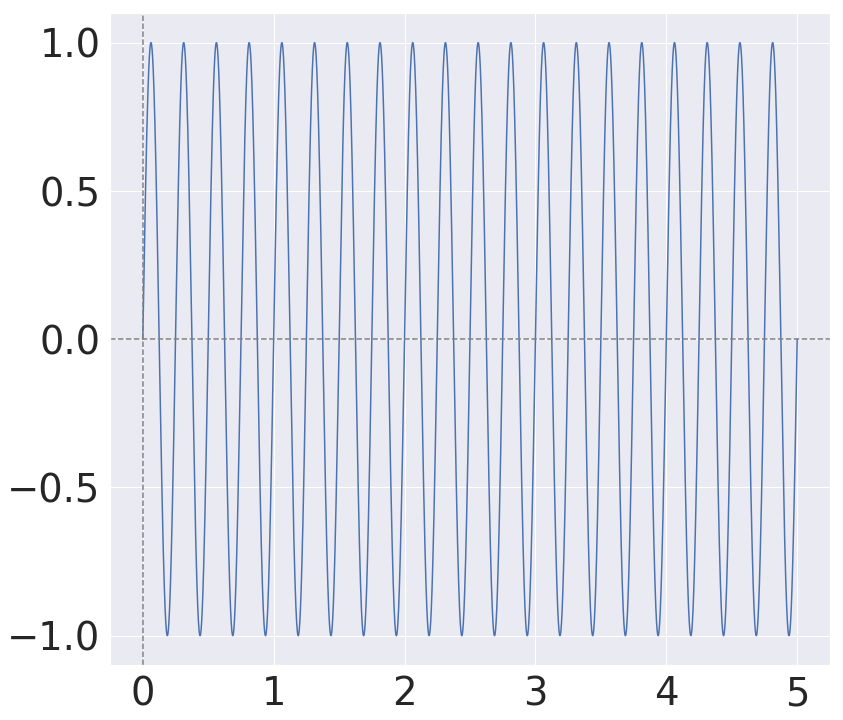

In [24]:
dt = 0.0001
total_time = 5.0
n_t = int(total_time / dt)
period = 0.250
time = np.linspace(0, total_time, num=n_t)
y = np.sin(time * 2 *  np.pi / period)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, y)

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray');

In [25]:
def average_till_t(t, function, dt):
    n_t = int(t / dt)
    if n_t > 0:
        return function[:n_t].mean()
    else:
        return function[0]

In [26]:
p = []
for t in time:
    p.append(average_till_t(t, y, dt))

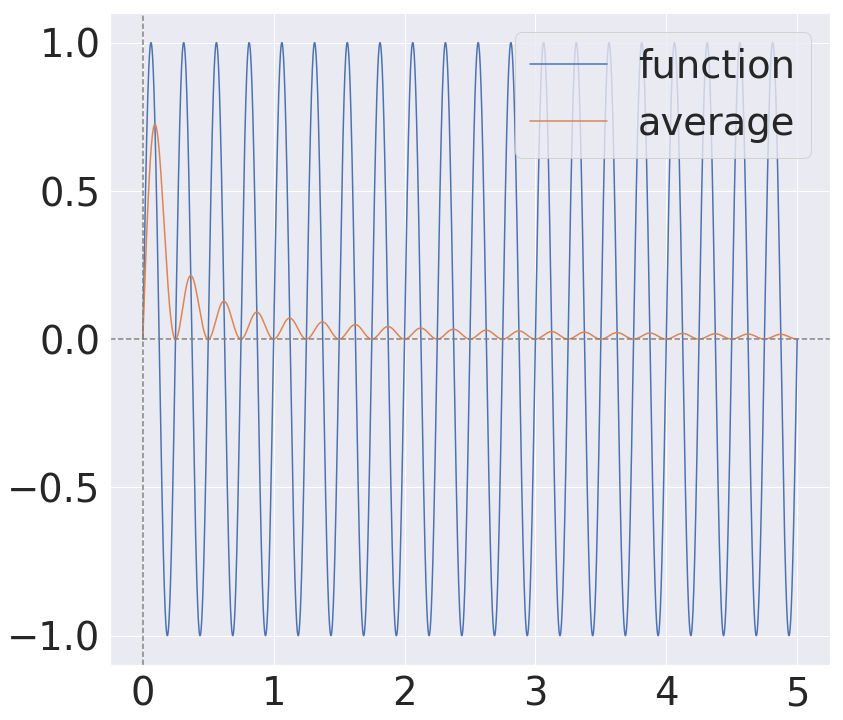

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, y, label='function')
ax.plot(time, p, label='average')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

#### Differential equation

This is the one that works

In [28]:
p_diff = np.zeros(n_t)

for index in range(1, n_t - 1):
    p_diff[index + 1] = p_diff[index] + (dt / time[index]) * (y[index] - p_diff[index])

In [29]:
p2 = np.zeros(n_t)
tau_p = 3.0
for index in range(n_t - 1):
    p2[index + 1] = p2[index] + (dt / tau_p) * (y[index] - p2[index])

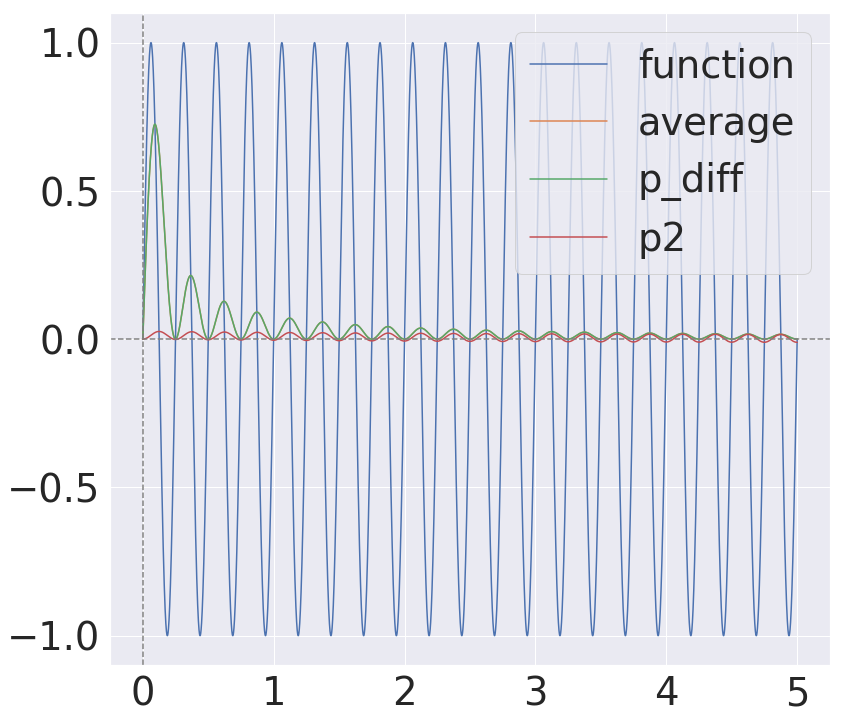

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, y, label='function')
ax.plot(time, p, label='average')
ax.plot(time, p_diff, label='p_diff')
ax.plot(time, p2, label='p2')


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

#### Long term difference


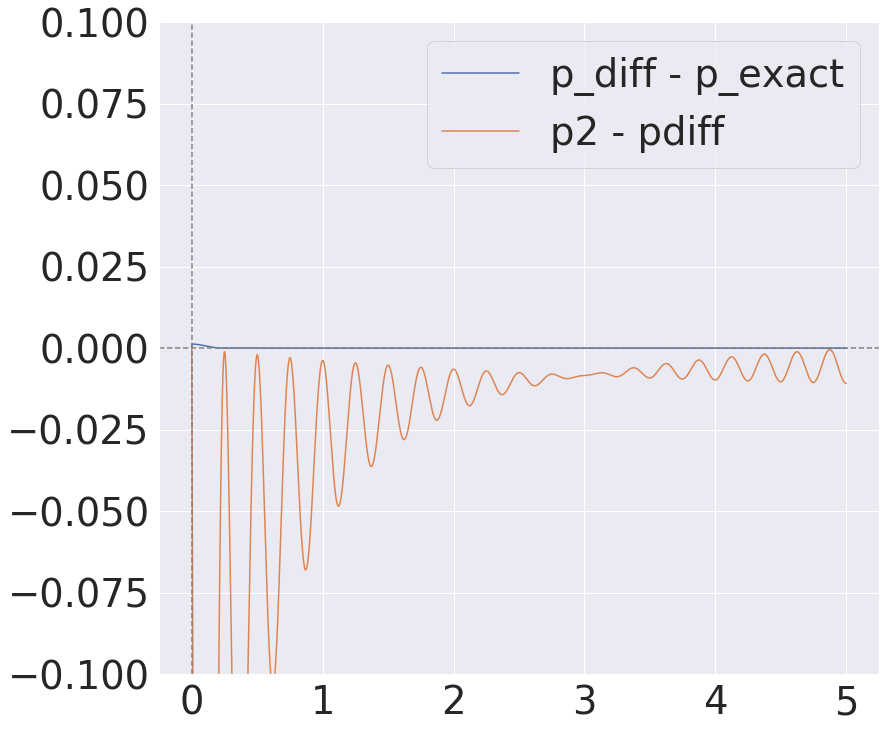

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, p_diff - p, label='p_diff - p_exact')
ax.plot(time, p2 - p_diff, label='p2 - pdiff')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.set_ylim([-0.1, 0.1])
ax.legend();

## Let's try it with a box

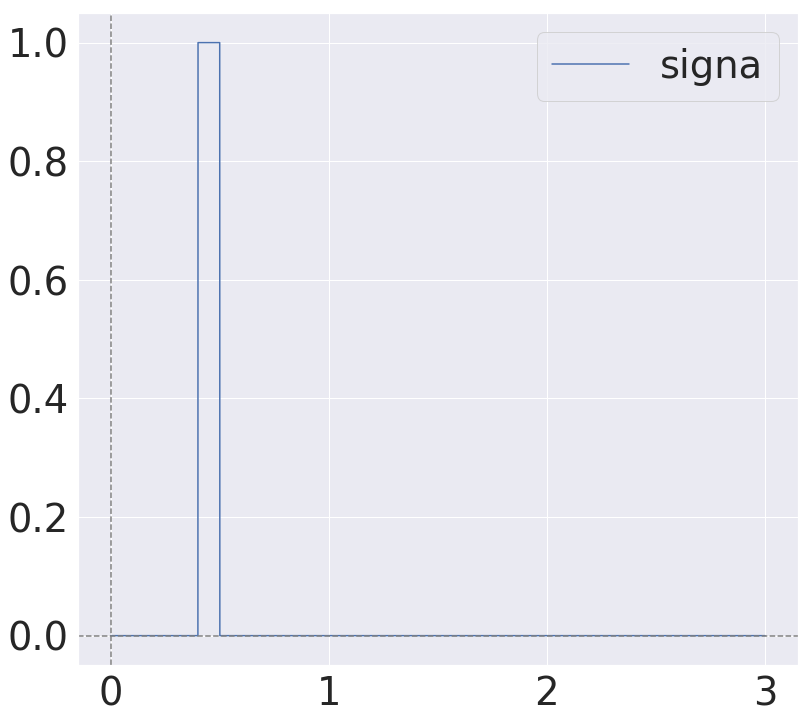

In [47]:
T = 3.0
dt = 0.0001
Tp = 0.100
T1 = 0.400

nt = int(T / dt)
ns = int(T1 / dt)
n_dur = int(Tp / dt)
ne = ns + n_dur

time = np.linspace(0.0, T, num=nt)
s = np.zeros(nt)
s[ns:ne] = 1.0

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, s, label='signa')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

In [73]:
p = []
for t in time:
    p.append(average_till_t(t, s, dt))

In [74]:
p_diff = np.zeros(nt)

for index in range(1, nt - 1):
    p_diff[index + 1] = p_diff[index] + (dt / time[index]) * (s[index] - p_diff[index])

In [75]:
tau_p_collection = [1.0, 5.0, 10.0]
p_filter_collections = []
for tau_p in tau_p_collection:
    p_filter = np.zeros(nt)
    for index in range(nt - 1):
        p_filter[index + 1] = p_filter[index] + (dt / tau_p) * (s[index] - p_filter[index])
        
    p_filter_collections.append(p_filter)

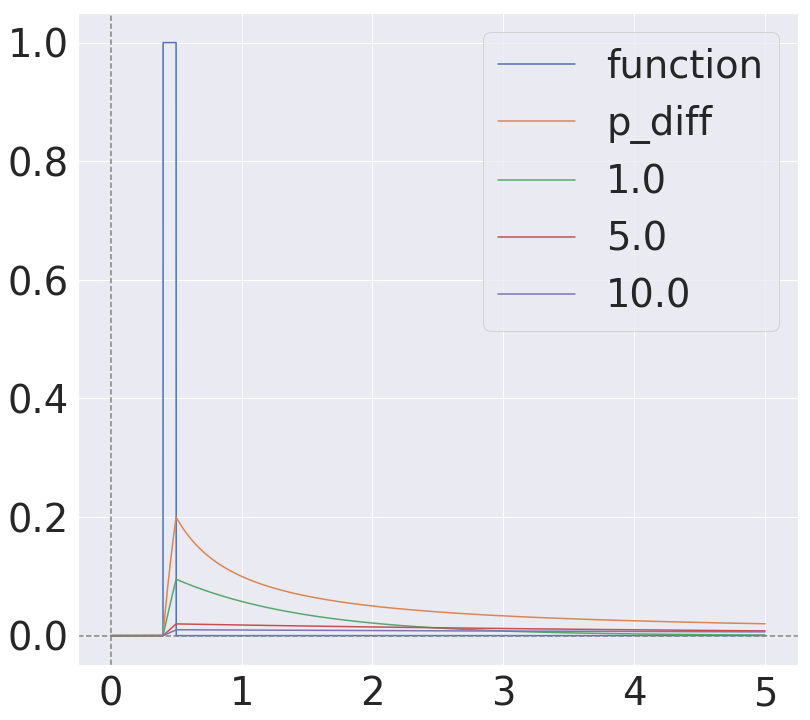

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, s, label='function')
# ax.plot(time, p, label='average')
ax.plot(time, p_diff, label='p_diff')
for index, p_filter in enumerate(p_filter_collections):
    ax.plot(time, p_filter, label=str(tau_p_collection[index]))


ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

#### Test different time windows

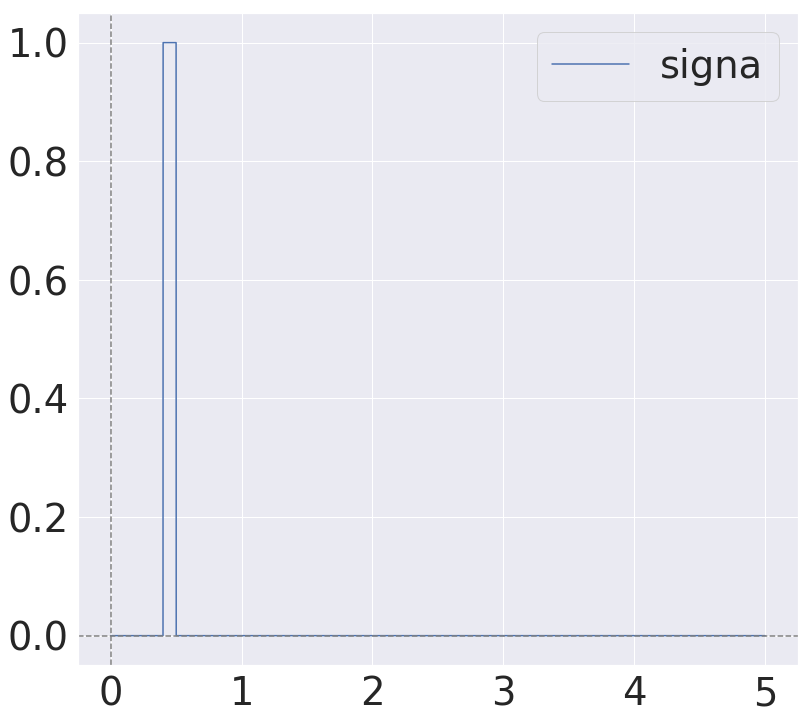

In [77]:
T = 5.0
dt = 0.0001
Tp = 0.100
T1 = 0.400

nt = int(T / dt)
ns = int(T1 / dt)
n_dur = int(Tp / dt)
ne = ns + n_dur

time = np.linspace(0.0, T, num=nt)
s = np.zeros(nt)
s[ns:ne] = 1.0

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, s, label='signa')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();

In [80]:
tau_p_collection = [0.100, 0.500, 1.0, 5.0, 10.0]
p_filter_collections = []
for tau_p in tau_p_collection:
    p_filter = np.zeros(nt)
    for index in range(nt - 1):
        p_filter[index + 1] = p_filter[index] + (dt / tau_p) * (s[index] - p_filter[index])
        
    p_filter_collections.append(p_filter)

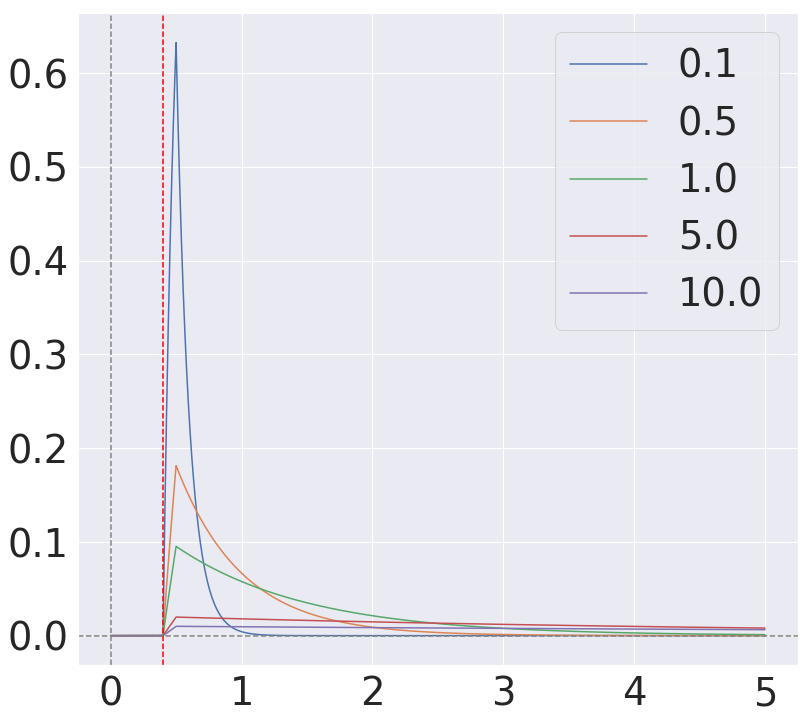

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.plot(time, p_diff, label='p_diff')
for index, p_filter in enumerate(p_filter_collections):
    ax.plot(time, p_filter, label=str(tau_p_collection[index]))


ax.axvline(T1, ls='--', color='red')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')

ax.legend();